<a href="https://colab.research.google.com/github/cintha22059/PEMWEB/blob/main/Proyek_Klasifikasi_Gambar_Cintha_Hafrida_Putri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Cintha Hafrida Putri

Email : devdan2510@gmail.com

ID Dicoding : cintha_bang

In [ ]:
# Install tensorflowjs

!pip install tensorflowjs

In [1]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.17.0


## **Data Loading**

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cinthahap","key":"48949cf247b7fce3430fdb39a9604efd"}'}

In [4]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/animal-faces
!unzip animal-faces.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train

In [5]:
os.listdir('./')

['.config', 'animal-faces.zip', 'kaggle.json', 'afhq', 'sample_data']

In [6]:
import os

# Tentukan path ke dataset
dataset_path = "./afhq"

# Print struktur direktori
for root, dirs, files in os.walk(dataset_path):
    print(f"Root: {root}")
    for dir_name in dirs:
        print(f"  Directory: {dir_name}")
    for file_name in files:
        print(f"  File: {file_name}")


Output streaming akan dipotong hingga 5000 baris terakhir.
  File: pixabay_cat_001482.jpg
  File: pixabay_cat_000827.jpg
  File: flickr_cat_000234.jpg
  File: pixabay_cat_002436.jpg
  File: pixabay_cat_000446.jpg
  File: pixabay_cat_000251.jpg
  File: pixabay_cat_003787.jpg
  File: pixabay_cat_003140.jpg
  File: pixabay_cat_003262.jpg
  File: pixabay_cat_002527.jpg
  File: pixabay_cat_000948.jpg
  File: pixabay_cat_000671.jpg
  File: flickr_cat_000577.jpg
  File: pixabay_cat_003578.jpg
  File: pixabay_cat_002854.jpg
  File: pixabay_cat_002210.jpg
  File: pixabay_cat_001504.jpg
  File: pixabay_cat_003099.jpg
  File: pixabay_cat_004095.jpg
  File: pixabay_cat_003278.jpg
  File: pixabay_cat_000627.jpg
  File: pixabay_cat_002957.jpg
  File: pixabay_cat_000319.jpg
  File: pixabay_cat_003724.jpg
  File: flickr_cat_000800.jpg
  File: flickr_cat_000475.jpg
  File: pixabay_cat_003764.jpg
  File: pixabay_cat_001128.jpg
  File: flickr_cat_000396.jpg
  File: flickr_cat_000229.jpg
  File: pixabay_c

In [7]:
import os
import shutil

# Tentukan path sumber dan tujuan
source_paths = ["./afhq/train", "./afhq/val"]  # Daftar direktori sumber
class_names = ['cat', 'dog', 'wild']  # Sesuaikan dengan nama kelas yang ada
destination_path = "./animal_faces"

# Membuat direktori tujuan jika belum ada
os.makedirs(destination_path, exist_ok=True)

# Buat subfolder untuk setiap kelas di dalam folder tujuan
for class_name in class_names:
    os.makedirs(os.path.join(destination_path, class_name), exist_ok=True)

# Menampilkan file dalam direktori sumber untuk debugging
for source_path in source_paths:
    print(f"Files in source directory '{source_path}':")
    print(os.listdir(source_path))  # Menampilkan file dalam direktori sumber

# Pindahkan gambar ke dalam subfolder berdasarkan kelas
for source_path in source_paths:
    for image_name in os.listdir(source_path):
        print(f"Checking file: {image_name}")  # Debugging
        try:
            if 'cat' in image_name:
                print(f"Moving {image_name} to cats folder.")
                shutil.move(os.path.join(source_path, image_name), os.path.join(destination_path, 'cat', image_name))
            elif 'dog' in image_name:
                print(f"Moving {image_name} to dogs folder.")
                shutil.move(os.path.join(source_path, image_name), os.path.join(destination_path, 'dog', image_name))
            elif 'wild' in image_name:
                print(f"Moving {image_name} to wild folder.")
                shutil.move(os.path.join(source_path, image_name), os.path.join(destination_path, 'wild', image_name))
        except Exception as e:
            print(f"Failed to move {image_name}: {e}")

print("Images have been sorted into their respective class folders.")


Files in source directory './afhq/train':
['wild', 'dog', 'cat']
Files in source directory './afhq/val':
['wild', 'dog', 'cat']
Checking file: wild
Moving wild to wild folder.
Checking file: dog
Moving dog to dogs folder.
Checking file: cat
Moving cat to cats folder.
Checking file: wild
Moving wild to wild folder.
Checking file: dog
Moving dog to dogs folder.
Checking file: cat
Moving cat to cats folder.
Images have been sorted into their respective class folders.


In [8]:
import os
import shutil

# Tentukan daftar folder utama yang akan menjadi tujuan akhir
main_folders = ['./animal_faces/cat', './animal_faces/dog', './animal_faces/wild']

# Loop melalui setiap folder utama
for main_folder in main_folders:
    # Loop melalui semua subfolder yang ada di dalam folder utama
    for root, dirs, files in os.walk(main_folder):
        for file in files:
            # Cek apakah file adalah gambar (misalnya, file .jpg atau .jpeg atau .png)
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                file_path = os.path.join(root, file)  # Dapatkan path lengkap dari file
                new_path = os.path.join(main_folder, file)  # Tentukan path baru di folder utama

                # Pindahkan file ke folder utama
                shutil.move(file_path, new_path)

    # Hapus folder kosong setelah memindahkan semua file
    for root, dirs, files in os.walk(main_folder, topdown=False):
        for dir in dirs:
            os.rmdir(os.path.join(root, dir))

print("Semua file telah dipindahkan ke folder utama masing-masing dan subfolder kosong telah dihapus.")


Semua file telah dipindahkan ke folder utama masing-masing dan subfolder kosong telah dihapus.


In [9]:
os.listdir('./')

['.config',
 'animal-faces.zip',
 'animal_faces',
 'kaggle.json',
 'afhq',
 'sample_data']

## **Plot Gambar Sample untuk Semua Kelas**

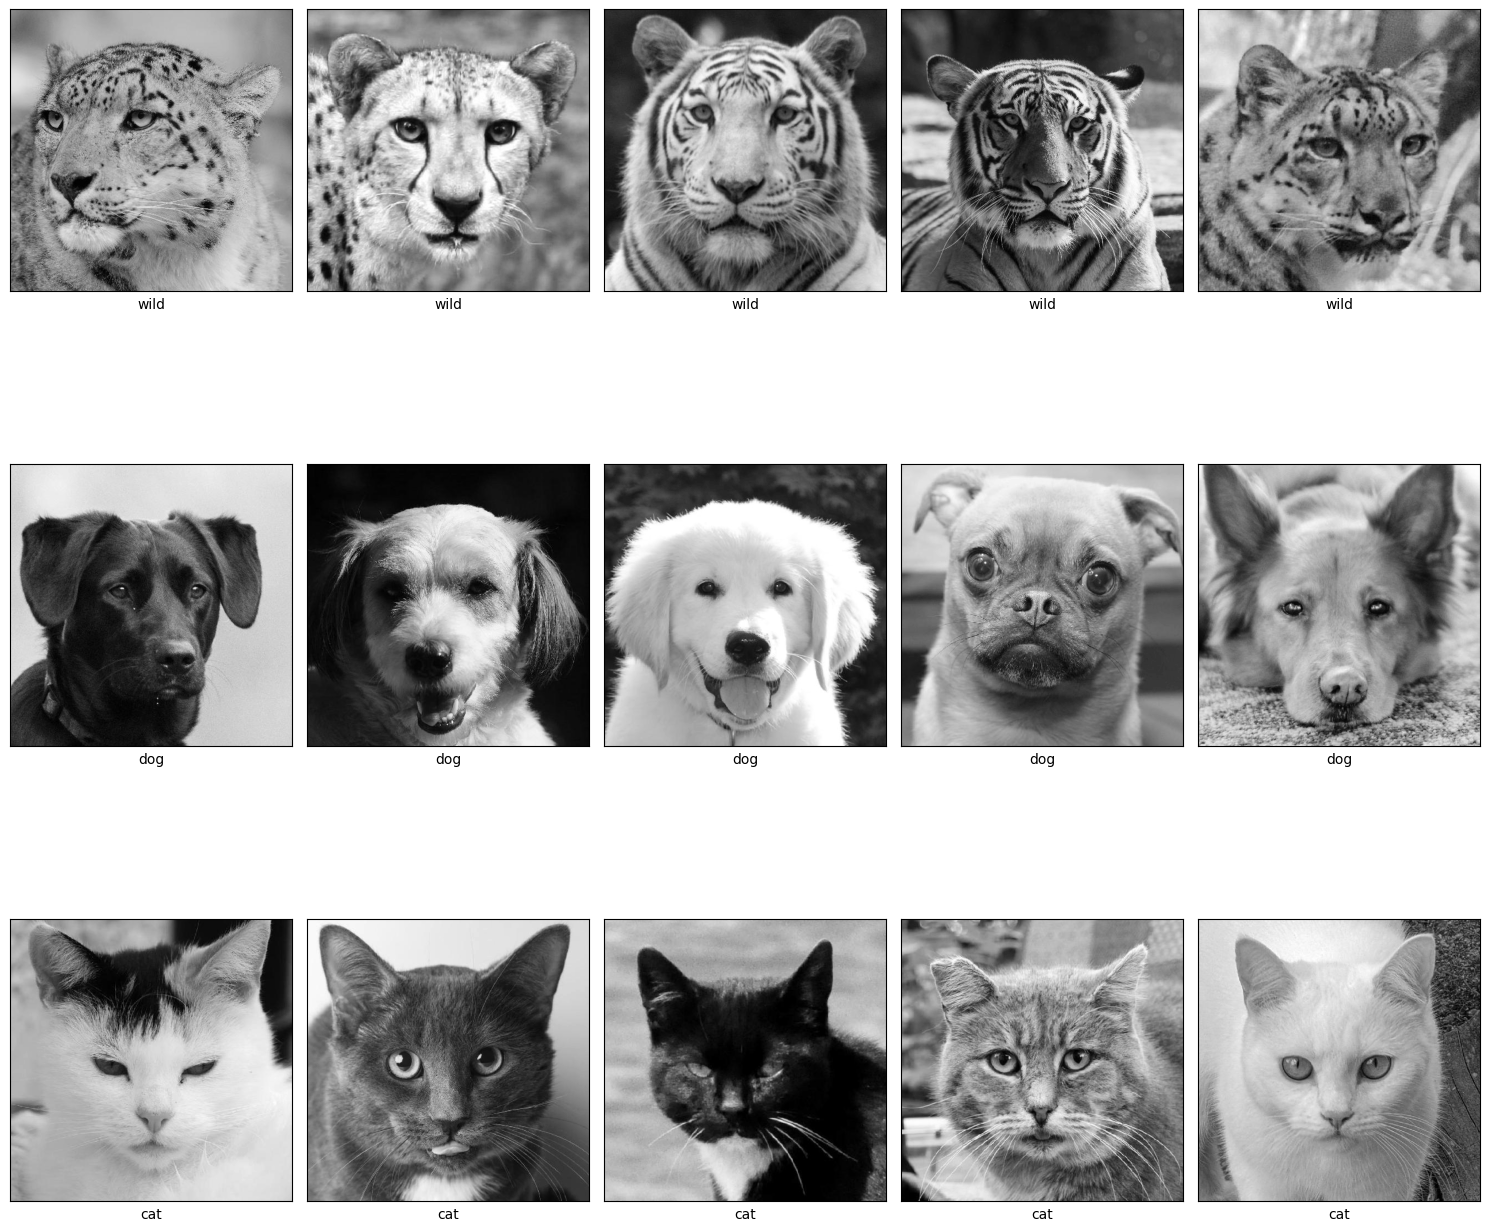

In [10]:

# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "./"
path_sub = os.path.join(path, "animal_faces")

# Mendapatkan daftar direktori yang valid (tidak dimulai dengan '.')
valid_directories = [d for d in os.listdir(path_sub) if not d.startswith('.')]

for i in valid_directories:
    lung_image[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali.
path_sub = "./animal_faces/"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

# Iterasi melalui direktori yang valid
for i, class_name in enumerate(valid_directories):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path).convert("L")  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

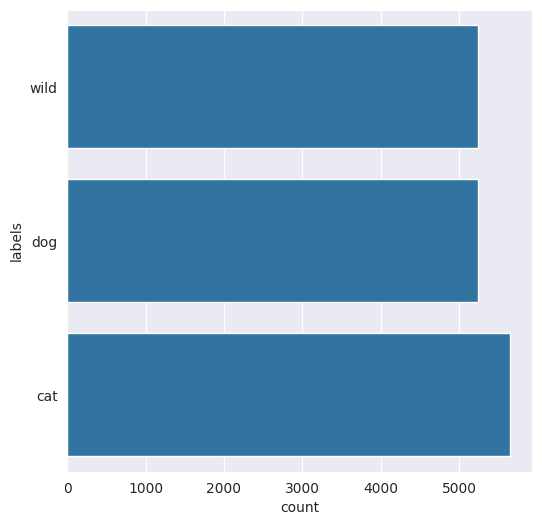

In [11]:
import seaborn as sns
# Define source path
lung_path = "./animal_faces/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)


## **Data Preprocessing**


## Data Augmentation

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.adjust_brightness(img, delta=random.uniform(0.1, 0.5))  # Sesuaikan nilai delta sesuai kebutuhan
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.random_blur(img, (3, 3))  # Ukuran kernel blur bisa disesuaikan
    return img

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter shearing range
    datagen = ImageDataGenerator(shear_range=0.2)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter width_shift_range dan height_shift_range
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

In [13]:
import os
import random
from skimage import io
from skimage.util import img_as_ubyte
import cv2

# Fungsi transformasi (anda perlu mendefinisikan fungsi-fungsi ini)
def anticlockwise_rotation(image):
    return cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

def clockwise_rotation(image):
    return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

def warp_shift(image):
    # Implementasikan fungsi untuk melakukan warp shift
    pass

def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def add_brightness(image, value=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = cv2.add(hsv[:, :, 2], value)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def flip_up_down(image):
    return cv2.flip(image, 0)

def sheared(image):
    # Implementasikan fungsi untuk melakukan shear
    pass

# Kamus transformasi
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise': clockwise_rotation,
    'warp shift': warp_shift,
    'blurring image': blur_image,
    'add brightness': add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

# Jalur ke gambar asli (kucing, anjing, hewan liar)
images_paths = ['./animal_faces/cat', './animal_faces/dog', './animal_faces/wild']
augmented_path = "animal_faces_augmented"  # Jalur untuk menyimpan gambar yang diaugmentasi
images = []  # Untuk menyimpan gambar yang telah diproses dari folder

# Membaca nama gambar dari setiap folder dan menambahkan jalur ke dalam array "images"
for path in images_paths:
    for im in os.listdir(path):
        # Memeriksa apakah file tersebut adalah gambar dengan ekstensi yang valid
        if im.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            images.append(os.path.join(path, im))

# Debug: Tampilkan jumlah gambar yang ditemukan
print(f'Jumlah gambar yang ditemukan: {len(images)}')

# Periksa apakah ada gambar untuk diaugmentasi
if len(images) == 0:
    print('Tidak ada gambar yang ditemukan di folder. Silakan periksa jalur atau ekstensi file.')
else:
    # Jumlah gambar yang akan ditambahkan dengan hasil transformasi augmentasi
    images_to_generate = 2000
    i = 1

    while i <= images_to_generate:
        image = random.choice(images)
        try:
            original_image = io.imread(image)

            # Memeriksa apakah gambar memiliki dimensi yang valid (3 atau 4 dimensi)
            if original_image.ndim not in [3, 4]:
                raise ValueError('Invalid image dimensions')

            transformed_image = None
            n = 0  # Variabel untuk melakukan iterasi sampai jumlah transformasi yang akan diterapkan
            transformation_count = random.randint(1, len(transformations))  # Pilih jumlah transformasi acak

            while n < transformation_count:  # Ubah <= menjadi < untuk menghindari satu transformasi tidak dipakai
                key = random.choice(list(transformations))  # Memilih dan memanggil metode secara acak
                transformed_image = transformations[key](original_image)
                n += 1

            new_image_path = "%s/augmented_image_%s.jpg" % (augmented_path, i)
            transformed_image = img_as_ubyte(transformed_image)  # Mengonversi gambar ke format byte
            cv2.imwrite(new_image_path, transformed_image)  # Simpan hasil transformasi augmentasi
            i += 1
        except ValueError as e:
            print('Could not read or process the image', image, ':', e, 'hence skipping it.')
        except Exception as e:
            print('An error occurred while processing the image', image, ':', e)


Jumlah gambar yang ditemukan: 16130
Could not read or process the image ./animal_faces/cat/pixabay_cat_004008.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/wild/flickr_wild_002248.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/wild/pixabay_wild_000520.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/cat/pixabay_cat_004641.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/dog/pixabay_dog_003420.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/cat/pixabay_cat_001235.jpg : Cannot convert from object to uint8. hence skipping it.
Could not read or process the image ./animal_faces/wild/pixabay_wild_000581.jpg : Cannot convert from object to uint8. hence skipping it.
Could n

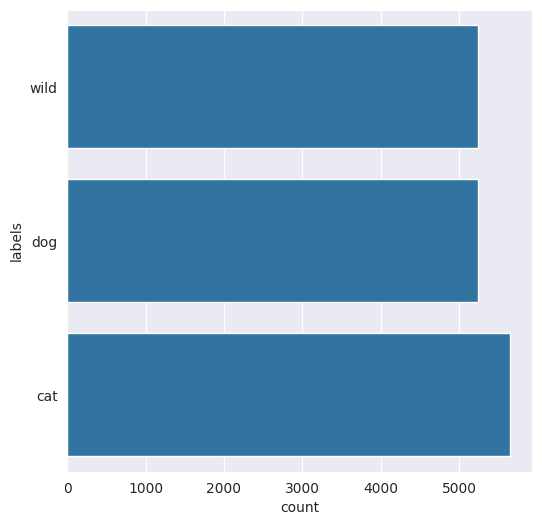

In [14]:
# Define source path
lung_path = "./animal_faces/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

## Split Dataset Train and Test

In [15]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= './animal_faces/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)


# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
cat,5653
dog,5239
wild,5238


In [16]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [17]:
# Menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [18]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))

train size 12904
test size 3226


In [19]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))


set    labels
test   cat       1121
       dog       1090
       wild      1015
train  cat       4532
       dog       4149
       wild      4223
dtype: int64 


                                              path labels    set
13722  ./animal_faces/wild/pixabay_wild_000367.jpg   wild   test
2931     ./animal_faces/cat/pixabay_cat_000272.jpg    cat  train
8217      ./animal_faces/dog/flickr_dog_000073.jpg    dog  train
12393     ./animal_faces/dog/flickr_dog_000173.jpg    dog  train
4650    ./animal_faces/wild/flickr_wild_002089.jpg   wild  train


In [20]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "./animal_faces/"
# Membuat variabel Dataset, dimana nanti menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"

In [21]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

## **Image Data Generator**

In [22]:
# Define training and test directories
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

train_cat = os.path.join(TRAIN_DIR, 'cat')
train_dog = os.path.join(TRAIN_DIR, 'dog')
train_wild = os.path.join(TRAIN_DIR, 'wild')
test_cat = os.path.join(TEST_DIR, 'cat')
test_dog = os.path.join(TEST_DIR, 'dog')
test_wild = os.path.join(TEST_DIR, 'wild')


print("Total number of cat images in training set: ", len(os.listdir(train_cat)))
print("Total number of dog images in training set: ", len(os.listdir(train_dog)))
print("Total number of wild images in training set: ", len(os.listdir(train_wild)))
print("Total number of cat images in test set: ", len(os.listdir(test_cat)))
print("Total number of dog images in test set: ", len(os.listdir(test_dog)))
print("Total number of wild images in test set: ", len(os.listdir(test_wild)))

Total number of cat images in training set:  4532
Total number of dog images in training set:  4149
Total number of wild images in training set:  4223
Total number of cat images in test set:  1121
Total number of dog images in test set:  1090
Total number of wild images in test set:  1015


In [64]:
# Create an ImageDataGenerator object normalizing the images
train_datagen = ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(100,100),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

validation_generator = datagen.flow_from_directory(TRAIN_DIR,
                                                   batch_size=32,
                                                   target_size=(100,100),
                                                   color_mode="grayscale",
                                                   class_mode='categorical',
                                                   subset='validation',
                                                   shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=1,
                                                  target_size=(100,100),
                                                  color_mode="grayscale",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 10325 images belonging to 3 classes.
Found 2579 images belonging to 3 classes.
Found 3226 images belonging to 3 classes.


## MODEL

In [65]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_final = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,1)))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# Flatten layer
model_final.add(Flatten())

# 1st Dense Layer
model_final.add(Dense(128, activation='relu'))
# 1st Dropout Layer
model_final.add(Dropout(0.5))

# 2nd Dense Layer
model_final.add(Dense(64, activation='relu'))
# 2nd Dropout Layer
model_final.add(Dropout(0.3))

# 3rd Dense Layer (tambahan)
model_final.add(Dense(32, activation='relu'))
# 3rd Dropout Layer (tambahan)
model_final.add(Dropout(0.2))

# Final Dense layer dengan multiple output units dan softmax activation
model_final.add(Dense(3, activation='softmax'))  # ubah angka 3 sesuai jumlah kelas yang diinginkan

######################### Compile Model ################################
model_final.compile(optimizer=tf.keras.optimizers.RMSprop(),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Summary of the Model Architecture
print(model_final.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                   │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 50, 50, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 25, 25, 32)          │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667,715 (2.55 MB)

 Trainable params: 667,523 (2.55 MB)

 Non-trainable params: 192 (768.00 B)

None


In [66]:
import tensorflow as tf
import os

# Callback untuk menghentikan pelatihan berdasarkan kondisi val_accuracy dan epoch
class createEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=7):
        super(createEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_accuracy = 0
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        # Menghentikan pelatihan jika val_accuracy mencapai 95%
        if current_val_accuracy >= 0.95:
            print('\n# Callback stopping training at epoch:', epoch,
                  ' with val_accuracy: %2.2f%%' % (current_val_accuracy * 100))
            self.model.stop_training = True

        # Menghentikan pelatihan jika tidak ada peningkatan val_accuracy selama `patience` epoch
        elif current_val_accuracy <= self.best_val_accuracy:
            self.wait += 1
            if self.wait >= self.patience:
                print('\n# Callback stopping training due to no improvement after', self.patience, 'epochs at epoch:', epoch)
                self.model.stop_training = True
        else:
            # Update val_accuracy terbaik dan reset counter wait
            self.best_val_accuracy = current_val_accuracy
            self.wait = 0

# Hitung jumlah gambar untuk setiap kelas
train_cat = os.path.join("Dataset-Final/train/cat")
train_dog = os.path.join("Dataset-Final/train/dog")
train_wild = os.path.join("Dataset-Final/train/wild")

count_cat = len(os.listdir(train_cat))
count_dog = len(os.listdir(train_dog))
count_wild = len(os.listdir(train_wild))

# Debug: Tampilkan jumlah gambar untuk setiap kelas
print("Jumlah gambar cat: ", count_cat)
print("Jumlah gambar dog: ", count_dog)
print("Jumlah gambar wild: ", count_wild)

# Menghitung bobot untuk setiap kelas
total_images = count_cat + count_dog + count_wild
weight_cat = (1 / count_cat) * (total_images / 3.0)
weight_dog = (1 / count_dog) * (total_images / 3.0)
weight_wild = (1 / count_wild) * (total_images / 3.0)

# Mendefinisikan class_weights untuk tiga kelas
class_weights = {0: weight_cat, 1: weight_dog, 2: weight_wild}

# Memulai pelatihan model dengan callback dan class_weights
%time
history_final = model_final.fit(
    train_generator,
    epochs=30,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[createEarlyStopping()]
)


Jumlah gambar cat:  4532
Jumlah gambar dog:  4149
Jumlah gambar wild:  4223
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


323/323 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.5759 - loss: 1.2789 - val_accuracy: 0.5646 - val_loss: 1.0178
Epoch 2/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.8972 - loss: 0.3175 - val_accuracy: 0.7553 - val_loss: 0.8968
Epoch 3/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9448 - loss: 0.1904 - val_accuracy: 0.9035 - val_loss: 0.4191
Epoch 4/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 363s 983ms/step - accuracy: 0.9578 - loss: 0.1458 - val_accuracy: 0.9310 - val_loss: 0.2120
Epoch 5/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.9715 - loss: 0.1056 - val_accuracy: 0.8907 - val_loss: 0.3594
Epoch 6/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.9772 - loss: 0.0870 - val_accuracy: 0.8845 - val_loss: 0.3970
Epoch 7/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 323s 998ms/step - accuracy: 0.9795 - loss: 0.0953 - val_accuracy: 0.9488 - val_loss: 0.1673
Epoch 8/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.9861 - loss: 0.0585
# Callback sto

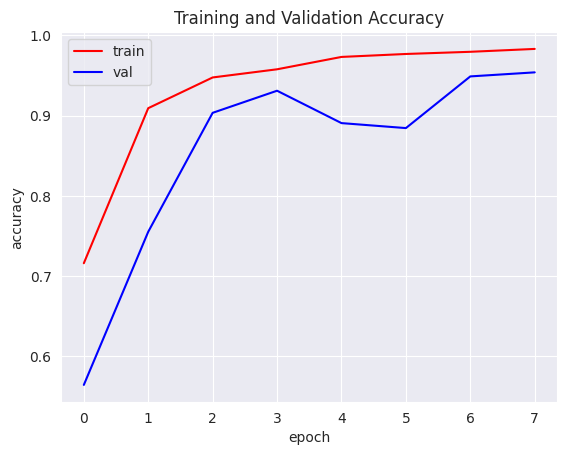

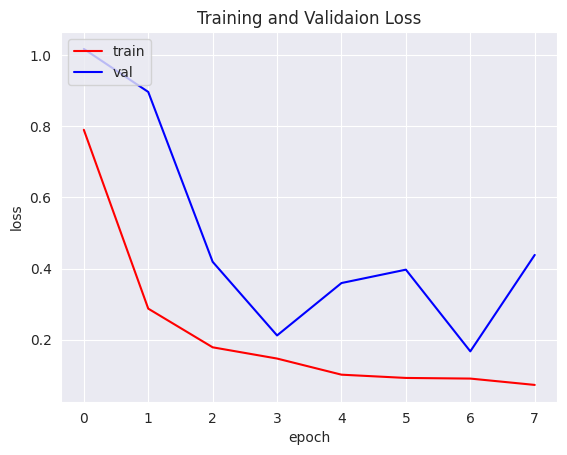

In [67]:
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


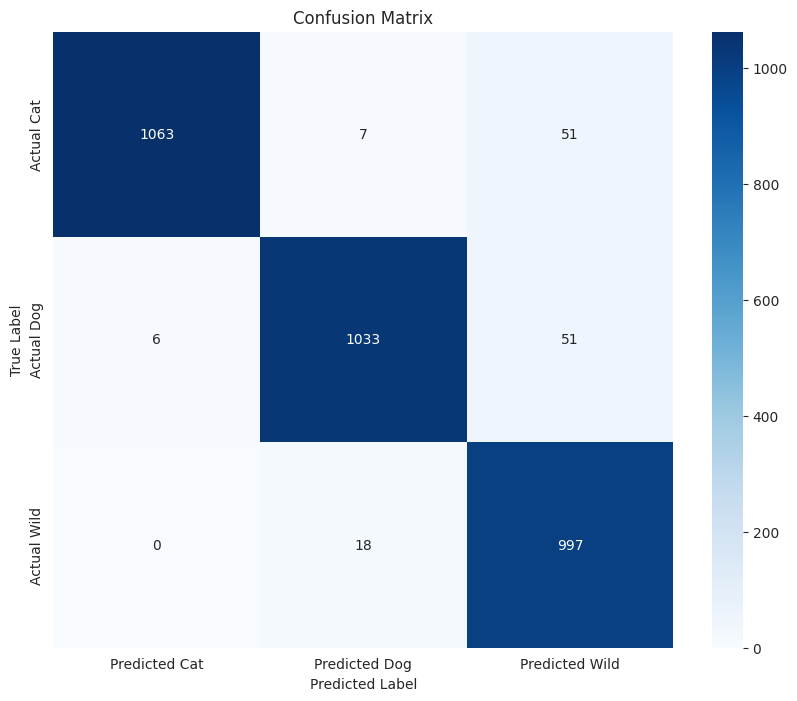


Classification Report:
              precision    recall  f1-score   support

         Cat     0.9944    0.9483    0.9708      1121
         Dog     0.9764    0.9477    0.9618      1090
        Wild     0.9072    0.9823    0.9432      1015

    accuracy                         0.9588      3226
   macro avg     0.9593    0.9594    0.9586      3226
weighted avg     0.9609    0.9588    0.9591      3226


Per-class Accuracy:
Cat: 0.9483
Dog: 0.9477
Wild: 0.9823


In [68]:

# Reset generator
test_generator.reset()

# Predict
preds_final = model_final.predict(test_generator, verbose=0)

# Convert predictions to class labels
preds_final_classes = np.argmax(preds_final, axis=1)

# Print Confusion Matrix
cm = pd.DataFrame(
    data=confusion_matrix(test_generator.classes, preds_final_classes, labels=[0, 1, 2]),
    index=["Actual Cat", "Actual Dog", "Actual Wild"],
    columns=["Predicted Cat", "Predicted Dog", "Predicted Wild"]
)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(
    y_true=test_generator.classes,
    y_pred=preds_final_classes,
    target_names=['Cat', 'Dog', 'Wild'],
    digits=4
))

# Additional metrics per class
print("\nPer-class Accuracy:")
for i, category in enumerate(['Cat', 'Dog', 'Wild']):
    class_correct = cm.iloc[i,i]
    class_total = cm.iloc[i].sum()
    print(f"{category}: {class_correct/class_total:.4f}")

In [69]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

# Flatten layer
model_1.add(Flatten())

# 1st Dense Layer
model_1.add(Dense(128, activation='relu'))
# 1st Dropout Layer
model_1.add(Dropout(0.5))

# 2nd Dense Layer
model_1.add(Dense(64, activation='relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# 3rd Dense Layer (tambahan)
model_1.add(Dense(32, activation='relu'))
# 3rd Dropout Layer (tambahan)
model_1.add(Dropout(0.2))

# Final Dense layer dengan multiple output units dan softmax activation
model_1.add(Dense(3, activation='softmax'))  # ubah angka 3 sesuai jumlah kelas yang diinginkan

######################### Compile Model ################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 50, 50, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 25, 25, 32)          │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667,715 (2.55 MB)

 Trainable params: 667,523 (2.55 MB)

 Non-trainable params: 192 (768.00 B)

None


In [71]:
import tensorflow as tf
import os

# Callback untuk menghentikan pelatihan berdasarkan kondisi val_accuracy dan epoch
class createEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=7):
        super(createEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_accuracy = 0
        self.wait = 0

# Hitung jumlah gambar untuk setiap kelas
train_cat = os.path.join("Dataset-Final/train/cat")
train_dog = os.path.join("Dataset-Final/train/dog")
train_wild = os.path.join("Dataset-Final/train/wild")

count_cat = len(os.listdir(train_cat))
count_dog = len(os.listdir(train_dog))
count_wild = len(os.listdir(train_wild))

# Debug: Tampilkan jumlah gambar untuk setiap kelas
print("Jumlah gambar cat: ", count_cat)
print("Jumlah gambar dog: ", count_dog)
print("Jumlah gambar wild: ", count_wild)

# Menghitung bobot untuk setiap kelas
total_images = count_cat + count_dog + count_wild
weight_cat = (1 / count_cat) * (total_images / 3.0)
weight_dog = (1 / count_dog) * (total_images / 3.0)
weight_wild = (1 / count_wild) * (total_images / 3.0)

# Mendefinisikan class_weights untuk tiga kelas
class_weights = {0: weight_cat, 1: weight_dog, 2: weight_wild}

# Memulai pelatihan model dengan callback dan class_weights
%time
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[createEarlyStopping()]
)


Jumlah gambar cat:  4532
Jumlah gambar dog:  4149
Jumlah gambar wild:  4223
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
Epoch 1/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 318s 984ms/step - accuracy: 0.9880 - loss: 0.0653 - val_accuracy: 0.9407 - val_loss: 0.2814
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 321s 994ms/step - accuracy: 0.9895 - loss: 0.0488 - val_accuracy: 0.9461 - val_loss: 0.5729
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 320s 989ms/step - accuracy: 0.9907 - loss: 0.0446 - val_accuracy: 0.8755 - val_loss: 0.6660
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9918 - loss: 0.0433 - val_accuracy: 0.9511 - val_loss: 0.2939
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 451s 1s/step - accuracy: 0.9935 - loss: 0.0265 - val_accuracy: 0.9589 - val_loss: 0.5132
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.9930 - loss: 0.0402 - val_accuracy: 0.9616 - val_loss: 0.2280
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.9931 -

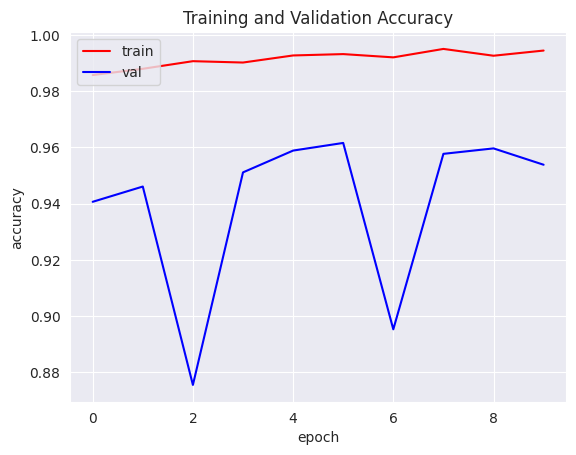

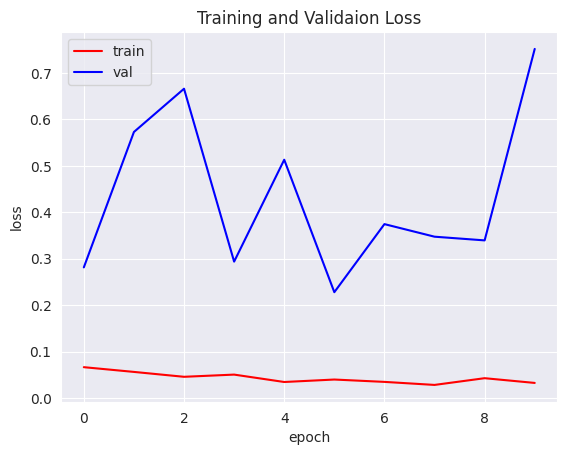

In [76]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

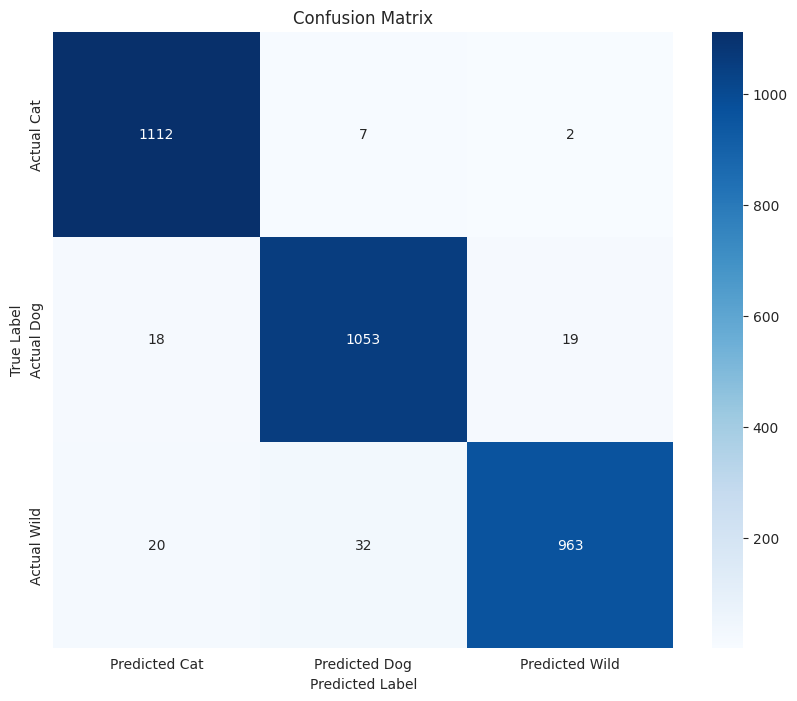


Classification Report:
              precision    recall  f1-score   support

         Cat     0.9670    0.9920    0.9793      1121
         Dog     0.9643    0.9661    0.9652      1090
        Wild     0.9787    0.9488    0.9635      1015

    accuracy                         0.9696      3226
   macro avg     0.9700    0.9689    0.9693      3226
weighted avg     0.9697    0.9696    0.9696      3226


Per-class Accuracy:
Cat: 0.9920
Dog: 0.9661
Wild: 0.9488


In [78]:

# Reset generator
test_generator.reset()

# Predict
preds_1 = model_1.predict(test_generator, verbose=0)

# Convert predictions to class labels
preds_1_classes = np.argmax(preds_1, axis=1)

# Print Confusion Matrix
cm = pd.DataFrame(
    data=confusion_matrix(test_generator.classes, preds_1_classes, labels=[0, 1, 2]),
    index=["Actual Cat", "Actual Dog", "Actual Wild"],
    columns=["Predicted Cat", "Predicted Dog", "Predicted Wild"]
)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(
    y_true=test_generator.classes,
    y_pred=preds_1_classes,
    target_names=['Cat', 'Dog', 'Wild'],
    digits=4
))

# Additional metrics per class
print("\nPer-class Accuracy:")
for i, category in enumerate(['Cat', 'Dog', 'Wild']):
    class_correct = cm.iloc[i,i]
    class_total = cm.iloc[i].sum()
    print(f"{category}: {class_correct/class_total:.4f}")

In [79]:
model_final.save('my_model.h5')

In [80]:
# Install tensorflowjs

!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: tensorboard
    Found existing installation: te

In [81]:
export_dir = 'saved_model/'
tf.saved_model.save(model_final, export_dir)

Cause: Unable to locate the source code of <function TFLayer._default_save_signature.<locals>.serving_default at 0x79c9ad181630>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function TFLayer._default_save_signature.<locals>.serving_default at 0x79c9ad181630>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function TFLayer._default_save_signature.<locals>.serving_default at 0x79c9ad181d80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function TFLayer._default_save_signature.<locals>.serving_default at 0x79c9ad181d80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

NameError: name 'tf' is not defined

In [1]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

NameError: name 'pathlib' is not defined

In [3]:
!pip freeze > requirements.txt